# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [22]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [23]:
# 1) Rozwiązanie za pomocą solve
A, b = main.spare_matrix_Abt(50, 12)

A_sq, b_sq = main.square_from_rectan(A, b)
s1 = np.linalg.solve(A_sq, b_sq)

time1 = %timeit -r 10 -n 100 -o np.linalg.solve(A_sq, b_sq)
memory1 = %memit -o  np.linalg.solve(A_sq, b_sq)


res1 = main.residual_norm(A, s1, b)
print('Norma residuum:', res1)

AttributeError: module 'main' has no attribute 'spare_matrix_Abt'

In [ ]:
# 2) Rozwiązanie za pomocą Lstsq
s2 = np.linalg.lstsq(A, b, rcond=-1)[0]

time2 = %timeit -r 10 -n 100 -o np.linalg.lstsq(A, b)
memory2 = %memit -o np.linalg.lstsq(A, b)


res2 = main.residual_norm(A, s2, b)
print('Norma residuum:', res2)

39.7 µs ± 1.24 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<magic-timeit>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


peak memory: 125.40 MiB, increment: 0.00 MiB
Norma residuum: 7.999155468575555e-09


In [ ]:
# 3) Rozwiązanie za pomocą rozkładu QR
Q, R = np.linalg.qr(A)
s3 = sp.linalg.solve_triangular(R, Q.T @ b)

time2 = %timeit -r 10 -n 100 -o np.linalg.qr(A)
memory2 = %memit -o np.linalg.qr(A)

res3 = main.residual_norm(A, s3, b)
print('Norma residuum:', res3)

28.3 µs ± 1.3 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 125.55 MiB, increment: 0.00 MiB
Norma residuum: 7.999154704357952e-09


In [ ]:
# 4) Rozwiązanie za pomocą rozkładu SVD
U, S, V = np.linalg.svd(A, full_matrices=False)
S = np.diag(S)
s4 = V.T @ np.linalg.solve(S, U.T @ b)
time2 = %timeit -r 10 -n 100 -o np.linalg.svd(A, full_matrices=False)
memory2 = %memit -o np.linalg.svd(A, full_matrices=False)
res4 = main.residual_norm(A, s4, b)
print('Norma residuum:', res4)

35.3 µs ± 773 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 125.61 MiB, increment: 0.00 MiB
Norma residuum: 7.999154304339426e-09


***Zadanie 2***

Utwórz dwa wektory $x_1$ oraz $x_2$ opiujące dochód i wydatki pewnego gospodarstwa.

Dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520]

Wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390]

Utwórz regresję liniową zależności wydatków od dochodów.

Jaki jest błąd uzyskanej prostej względem danych? Czy jest możliwość uzyskania lepszego wyniku?

W celu wyznaczenia współczynników wykorzystaj niniejszą informację https://en.wikipedia.org/wiki/Simple_linear_regression


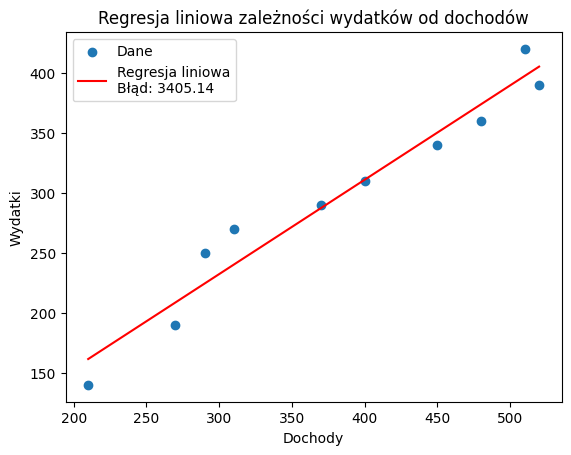

Błąd uzyskanej prostej jest sumą kwadratów różnic między przewidywanymi wartościami a rzeczywistymi wartościami wydatków.
Aby poprawić wynik, można rozważyć użycie bardziej zaawansowanych modeli regresji lub dostosować istniejące parametry modelu.


In [ ]:
x1 = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])
x2 = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])

beta = np.sum((x1 - np.mean(x1)) * (x2 - np.mean(x2))) / np.sum((x1 - np.mean(x1))**2)
alpha = np.mean(x2) - beta * np.mean(x1)

y = alpha + beta * x1

# Obliczenie błędu uzyskanej prostej
error = np.sum((y - x2)**2)

# Wykres
plt.scatter(x1, x2, label='Dane')
plt.plot(x1, y, label=f'Regresja liniowa\nBłąd: {error:.2f}', color='red')
plt.xlabel('Dochody')
plt.ylabel('Wydatki')
plt.legend()
plt.title('Regresja liniowa zależności wydatków od dochodów')
plt.show()
print("Błąd uzyskanej prostej jest sumą kwadratów różnic między przewidywanymi wartościami a rzeczywistymi wartościami wydatków.")
print("Aby poprawić wynik, można rozważyć użycie bardziej zaawansowanych modeli regresji lub dostosować istniejące parametry modelu.")

***Zadanie 3***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj trzy wektory $x_1$, $x_2$ oraz $\epsilon$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.
2. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$
- $x_1$, $x_2$ i $x_1 * x_2$

z parametrem *axis = 1*. To zadanie jest przygotowaniem struktury danych potrzebnych przy regresji liniowej w dalszej części zadania.


3. Na podstawie wektoró z punktu 1 wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x_1-0.5x_2+\epsilon
$$

Dla lepszego zobrazowania problemu należy spojrzeć na niego w sposób następujący:
 - $y$ - proces który chcemy w dalszej części zadania zamodelować, a którego dokładnego opisu nie znamy
 - $x_1, x_2$ - zmienne niezależne które jesteśmy w stanie mierzyć i wiemy że wpływają na proces
 - $\epsilon$ - zakłócenie procesu




4. W zależności od możliwości pomiaru zmiennych niezależnych można podjąć próbę zamodelowania procesu, na potrzeby ćwiczenia wykorzystana zostanie [regresja liniowa](https://pl.wikipedia.org/wiki/Regresja_liniowa). Zakładając że dostępne dane to wektor wartości $y$ i odpowiednio wektor $x_1$ lub $x_2$ do obliczenia jej współczynników można użyć rozkładu QR. Aby to zrobić należy przyjąć hipotetyczny model procesu (wzory 1-4) i potraktować "zmierzone" i podstawione do wzoru dane jako układ równań

 Korzystając z macierzy z punktu 3 oblicz współczynniki regresji liniowej z wykorzystaniem rozkładu QR, dla  modeli procesu opisanych w następujacy sposób:

 $$ \hat{y} \sim a + z_1 + z_2 + ... + z_n$$
 Gdzie:
 - $\hat{y}$ - przybliżenie modelowanego procesu
 - $a$ - wyraz wolny
 - $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model

Celem regresji jest dobranie takich współczynników zmiennych niezależnych i wyrazu wolnego, aby zaproponowany model jak najbliżej odwzorowywał pierwotny procecs.


Modele do przeprowadzenia eksperymentów:
 1. $\hat{y}\sim a+x_1$   
 2. $\hat{y}\sim a+x_2$
 3. $\hat{y}\sim a+x_1+x_2$
 4. $\hat{y}\sim a+x_1+x_2+x_1*x_2$

  
5. Przeanalizuj (znanymi metrykami) i przedstaw otrzymane wyniki na odpowiednich subplotach.

Text(0, 0.5, 'y')

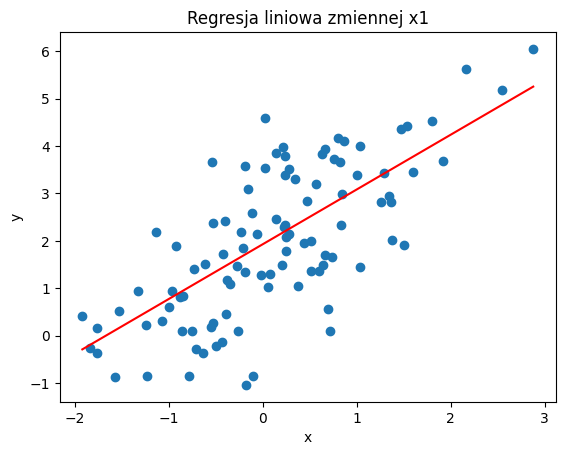

In [ ]:
x1 = np.random.normal(0, 1, size=(100, 1))
x2 = np.random.normal(loc=0.0, scale=1.0, size=(100, 1))
e = np.random.normal(loc=0.0, scale=1.0, size=(100, 1))
ones = np.ones([100, 1])

v1 = np.concatenate([ones, x1], axis = 1)
v2 = np.concatenate([ones, x2], axis = 1)
v3 = np.concatenate([ones, x1, x2], axis = 1)
v4 = np.concatenate([ones, x1, x2, x1*x2], axis = 1)

y = 2 + x1 - 0.5*x2 + e
range_x1 = [min(x1), max(x1)]
range_x2 = [min(x1), max(x2)]

Q, R = np.linalg.qr(v1)
sol1 = sp.linalg.solve_triangular(R, Q.T @ y)
y_1 = sol1[0] + sol1[1] * range_x1
plt.scatter(x1, y)
plt.plot(range_x1, y_1, 'r')
plt.title('Regresja liniowa zmiennej x1')
plt.xlabel('x')
plt.ylabel('y')


Text(0, 0.5, 'y')

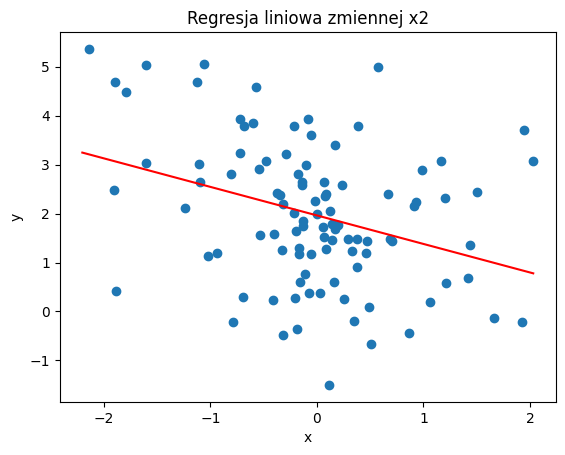

In [ ]:
Q, R = np.linalg.qr(v2)
sol2 = sp.linalg.solve_triangular(R, Q.T @ y)
y_2 = sol2[0] + sol2[1] * range_x2
plt.scatter(x2, y)
plt.plot(range_x2, y_2, 'r')
plt.title('Regresja liniowa zmiennej x2')
plt.xlabel('x')
plt.ylabel('y')

[Text(0.5, 0, 'x1'), Text(0.5, 0.5, 'x2'), Text(0.5, 0, 'y')]

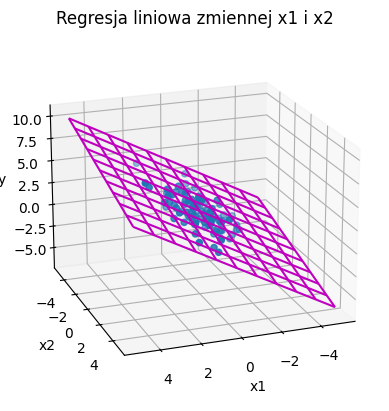

In [45]:
# y~a+x1+x2
Q, R = np.linalg.qr(v3)
sol3 = sp.linalg.solve_triangular(R, Q.T @ y)
X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
y_3 = sol3[0] + sol3[1] * X + sol3[2] * Y
fig4 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, y_3, color='m', rstride=100, cstride=100)
ax.scatter(x1, x2, y)
ax.view_init(20, 70)
ax.set_title('Regresja liniowa zmiennej x1 i x2')
ax.set(xlabel='x1', ylabel='x2', zlabel='y')

[Text(0.5, 0, 'x2'), Text(0.5, 0.5, 'x2'), Text(0.5, 0, 'y')]

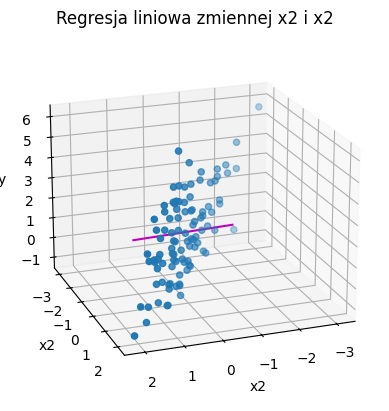

In [51]:
# y~a+x2+x2
Q, R = np.linalg.qr(v4)
sol4 = sp.linalg.solve_triangular(R, Q.T @ y)
X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
range_4 = np.array([range_x2[0][0], range_x2[1][0]])
y_4 = sol4[0] + sol4[1] * range_4 + b[2] * range_4
fig4 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x2, x2, y)
ax.plot(xs=range_4, ys=range_4, zs=y_4, color='m')
ax.view_init(20, 70)
ax.set_title('Regresja liniowa zmiennej x2 i x2')
ax.set(xlabel='x2', ylabel='x2', zlabel='y')

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)